<a href="https://colab.research.google.com/github/thiagonoobre/Customer-Insights-Segmentation-KMeans/blob/main/Customer_Insights_Segmentation_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## INSIGHTS E SEGMENTAÇÃO DE CLIENTES: MODELO K-MEANS

Nesse projeto estaremos trabalhando com conjunto de dados da ***Contoso Corporation***, que é uma empresa fictícia da **Microsoft**, no qual eles disponibilizaram um Banco de dados, que simula uma multinacional no setor de varejo ([link](https://www.microsoft.com/en-us/download/details.aspx?id=18279)). Seu banco de dados contém informações relacionadas a vendas, produtos, clientes e transações financeiras, oferecendo um cenário realista para explorar técnicas de análise de dados e gerar insights de negócios.

Neste notebook, realizaremos uma análise exploratória das vendas da Contoso, utilizando SQL para consultar e combinar tabelas, a fim de extrair informações valiosas e compreender melhor os padrões de vendas e o comportamento dos clientes.



![](https://learn.microsoft.com/pt-br/microsoft-365/media/contoso-overview/contoso-overview-fig1.png?view=o365-worldwide)

### 1\. Entendendos os Dados

Nosso foco será nas tabelas de vendas (`FactOnlineSales`) e clientes (`DimCustomer`). Através da análise desses dados e de suas relações com outras tabelas, buscaremos um entendimento mais completo do nosso banco de dados.

A análise não abrangerá todas as colunas das tabelas, no entanto, essa amostra nos permite ter uma ideia da dimensão do banco de dados e da complexidade dos dados que ele contém.

Apresentaremos as consultas (`queries`) utilizadas para extrair os nomes das colunas.

#### **1\.1 FactOnlineSales**

* Query para extrair os nomes das colunas


```sql
SELECT COLUMN_NAME
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = 'FactOnlineSales'



Os dados replesentam as informações de vendas contendo as seguintes colunas:

* OnlineSalesKey = Id das vendas
* DateKey = Data da venda
* StoreKey = Id da Loja
* ProductKey = Id do Produto
* PromotionKey = Id da Promoção
* CurrencyKey = Id da Moeda
* CustomerKey = Id do Cliente
* SalesOrderNumber = Número do pedido de venda
* SalesOrderLineNumber = Número da linha do pedido de vendas
* SalesQuantity = Quantidade de vendas
* SalesAmount = Valor das vendas
* ReturnQuantity = Quantidade de devolução
* ReturnAmount = Valor da devolução
* DiscountQuantity = Quantidade do desconto
* DiscountAmount = Valor do desconto
* TotalCost = Custo total
* UnitCost = Custo unitário
* UnitPrice = Preço unitário

#### **1\.2 DimCustomer**

* Query para extrair os nomes das colunas



```sql
SELECT COLUMN_NAME
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = 'DimCustomer'



Os dados replesentam as informações dos Clientes contendo as seguintes colunas:

* CustomerKey = Id do Cliente
* GeographyKey = Id da Geografia
* CustomerLabel = Rótulo do Cliente
* Title = Título
* FirstName = Primeiro Nome
* MiddleName = Nome do Meio
* LastName = Sobrenome
* NameStyle = Estilo do Nome
* BirthDate = Data de Nascimento
* MaritalStatus = Estado Civil
* Suffix = Sufixo
* Gender = Gênero
* EmailAddress = Endereço de Email
* YearlyIncome = Renda Anual
* TotalChildren = Total de Filhos
* NumberChildrenAtHome = Número de Filhos em Casa
* Education = Educação
* Occupation = Ocupação
* HouseOwnerFlag = Indicador de Proprietário de Casa
* NumberCarsOwned = Número de Carros Possuídos
* AddressLine1 = Endereço Linha 1
* AddressLine2 = Endereço Linha 2
* Phone = Telefone
* DateFirstPurchase = Data da Primeira Compra
* CustomerType = Tipo de Cliente
* CompanyName = Nome da Empresa

### 2\. Exploração de Dados

#### **2\.1 Coleta**

Para iniciar a análise dos dados, realizei uma consulta SELECT TOP(5) em cada uma das tabelas principais:`DimCustomer` e `FactOnlineSales`. Essa consulta me permitiu obter uma amostra dos 5 primeiros registros de cada tabela, o que me deu uma visão geral rápida da estrutura e dos dados contidos em cada uma delas. Essa abordagem é útil para validar a integridade dos dados e identificar possíveis inconsistências antes de realizar análises mais aprofundadas.

- FactOnlineSales

```sql
SELECT TOP(5) * FROM FactOnlineSales
 ```

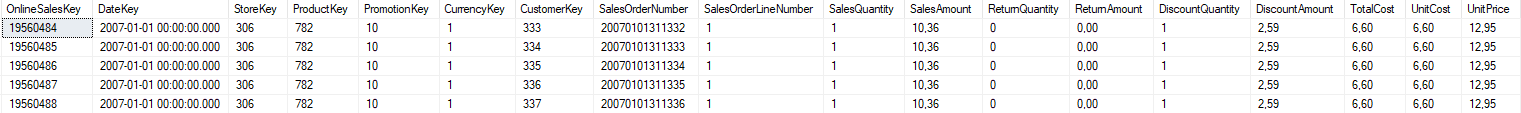

- DimCustomer

```sql
SELECT TOP(5) * FROM DimCustomer
 ```

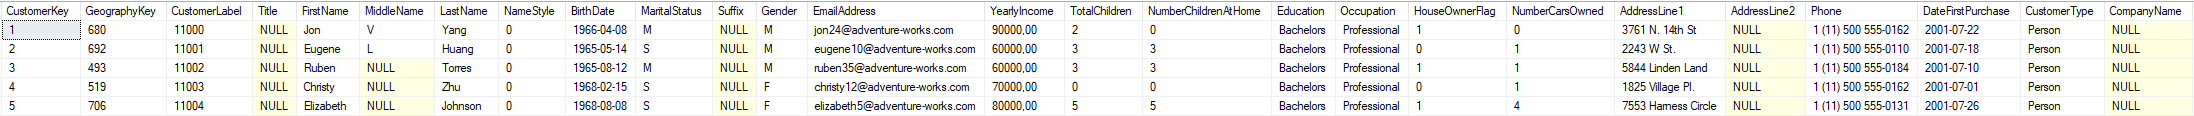

**As queries a seguir dara uma visão da quantidade de registros que temos em cada tabela.**

- FactOnlineSales

```sql
SELECT COUNT(*) FROM FactOnlineSales
 ```

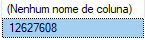

- DimCustomer

```sql
SELECT COUNT(*) FROM DimCustomer
 ```

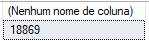

>Como podemos ver temos grande quantidade de registro de vendas. O próximo passo é investigar a qualidade dos dados nas suas tabelas `DimCustomer` e `FactOnlineSales`. Para isso, utilizaremos consultas SQL específicas para identificar dados nulos e verificar os tipos de dados em cada coluna. Considerando que você já possui familiaridade com essas tabelas, apresentarei a seguir as consultas e seus objetivos.


#### **2\.2 Estrutura**

```sql
SELECT
    COLUMN_NAME AS ColumnName,
    DATA_TYPE AS DataType,
    IS_NULLABLE AS IsNullable
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = 'TableName';


- FactOnlineSales

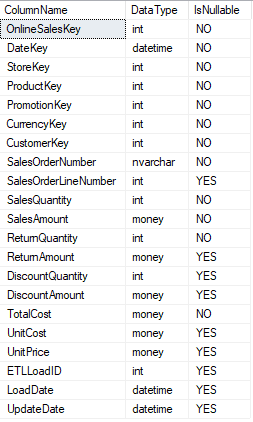

- DimCustomer

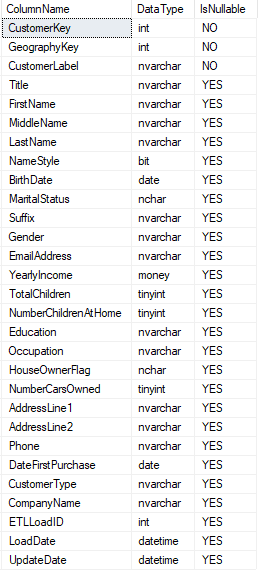


**Explicação dos Campos**

1. **`COLUMN_NAME`**: Nome da coluna na tabela.
2. **`DATA_TYPE`**: Tipo de dado da coluna (ex.: `int`, `varchar`, etc.).
3. **`IS_NULLABLE`**: Indica se a coluna permite valores nulos (`YES` ou `NO`).





Mesmo que uma coluna esteja configurada como **`IS_NULLABLE = YES`**, permitindo valores nulos, isso não significa que ela necessariamente tenha valores nulos armazenados. A configuração indica apenas que o banco de dados aceita entradas nulas para aquela coluna, mas o conteúdo real da tabela depende dos dados inseridos. Por isso, é importante verificar diretamente o número de valores nulos para ter uma visão clara da integridade dos dados.

#### **2\.3 Dados Faltantes**

Para garantir a qualidade dos dados em nossas análises, vamos iniciar a verificação de valores nulos nas colunas do tipo `varchar` (texto). Concentraremos nossos esforços nas colunas que serão utilizadas como critério de filtragem, agrupamento ou cálculo nas próximas etapas, a fim de evitar resultados imprecisos.

- FactOnlineSales

>A tabela `FactOnlineSales`  possui restrições de integridade em algumas colunas, garantindo a presença de dados nesses campos.


- DimCustomer

```sql
SELECT COUNT(*) FROM DimCustomer WHERE FirstName IS NULL


>Resultado: 385
>
>A coluna de `FirstName` pode-se encontrar o primeiro nome do cliente, mas encontramos 385 valores nulos. Não só nela, mas se fizer uma consulta mais aprofunda, pode ser enccontrado os mesmo resultados para as colunas de `LastName`, `BirthDate`, `Gender` e `EmailAddress`, no qual são informações essenciais para as nossas consultas.




```sql
SELECT * FROM DimCustomer WHERE FirstName IS NULL


>Ao analisar os valores nulos nas colunas `LastName`, `BirthDate`, `Gender` e `EmailAddress`, observamos que a maioria está concentrada em registros onde o `CustomerType` é 'Company'. Essa situação é esperada, pois a Contoso atende tanto empresas quanto pessoas físicas. Essa informação é fundamental para nossas próximas análises.

```sql
SELECT * FROM DimCustomer WHERE CustomerType = 'Person'



>Ao filtrar os dados para clientes do tipo 'Person', constatamos que a coluna `CompanyName` não possui valor para esses registros.

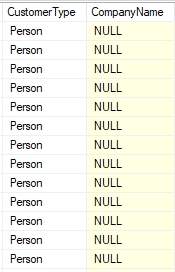

>A Contoso possui uma base de clientes diversificada, incluindo tanto pessoas físicas quanto empresas. Isso nos permite realizar análises abrangentes sobre os diferentes perfis de consumidores.

---

### 3\. Análise de dados

**Pergunta:** Quais são os clientes mais valiosos e qual o ticket médio por compra?


Após a exploração inicial dos dados, passamos à etapa de análise para extrair insights acionáveis que auxiliem na tomada de decisão. Nesta etapa, focaremos em dois pilares:
- Comportamento dos clientes
- Tendências e padrões de vendas

Essas análises serão realizadas com base nas tabelas de Clientes, Vendas Online.


- De primeiro momento vamos entender as vendas registradas de quais anos

```sql
SELECT
	DISTINCT
	YEAR(DateKey) AS 'YEAR'
FROM
	FactOnlineSales


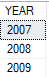

> Ao analisarmos os resultados desta consulta, conseguimos determinar os anos exatos que estão incluídos em nossa base de dados de vendas. Essa informação é essencial para calcular a frequência de compra dos clientes, ou seja, quantas vezes cada cliente realizou uma compra em um determinado período.

---

Para realizar o cálculo, utilizamos as tabelas `DimCustomer` e `FactOnlineSales`. No entanto, é necessário filtrar os dados por tipo de cliente (pessoa física ou jurídica). Essa filtragem é crucial, pois empresas tendem a realizar compras de maior valor, o que pode distorcer nossa análise, gerando **outliers** indesejados:

- Total gasto por cliente
- Frequência de compras
- Ticket médio

```sql

SELECT
	f.CustomerKey,
	SUM(SalesAmount) AS 'RECEITA_TOTAL',
	COUNT(OnlineSalesKey) AS 'FREQUÊNCIA_COMPRA',
	SUM(SalesAmount) / COUNT(OnlineSalesKey) AS 'TICKET_MEDIO'
FROM
	FactOnlineSales AS f
INNER JOIN DimCustomer AS c
	ON f.CustomerKey = c.CustomerKey
WHERE CustomerType = 'Person'
GROUP BY f.CustomerKey
ORDER BY RECEITA_TOTAL


>O próximo passo envolve a importação dos dados extraídos do ***SQL Server*** para a linguagem Python, utilizando a biblioteca ***Pandas***. Clonaremos um repositório do GitHub onde os dados já estão armazenados. Em seguida, realizaremos uma análise da qualidade dos dados para garantir a confiabilidade das próximas etapas da análise.

#### **3\.1 Clonando o Repositório**

Nesse momento teremos que trazer a base de dados para o colab para que possamos tratar e trabalhar esses dados nos seguintes passos:
- Clonar a base de dados `resultado_query_freq_ticket_receita.csv, dentro do repositório do git hub
- Acessar a pasta onde está a bade de dados
- Baixar a base de dados compilada
- Verificar e acessar a base de dados

In [2]:
# Clone o repositório
# Se você tiver usando o colab você verificar que em ARQUIVOS o clone do repositório
!git clone https://github.com/thiagonoobre/Projeto_Analise_de_Vendas.git


Cloning into 'Projeto_Analise_de_Vendas'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 47 (delta 18), reused 15 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (47/47), 13.56 MiB | 7.84 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [3]:
# Acesse a pasta com o código
%cd /content/Projeto_Analise_de_Vendas/arquivos_csv
!ls  # verifica os arquivos do projeto

/content/Projeto_Analise_de_Vendas/arquivos_csv
resultado_query_freq_ticket_receita.csv
resultado_query_yearlyincome_education_Occupation_numbercars.csv


#### **3\.2 Coleta**

- Iniciaremos a análise exploratória acessando os dados do repositório

##### ***3\.2\.1 imports***

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
# Para ajudar a achar o caminho do arquivo
# você pode selecionar o arquivo desejado clicar com botão direito
# e copiar o caminho

df = pd.read_csv('/content/Projeto_Analise_de_Vendas/arquivos_csv/resultado_query_freq_ticket_receita.csv', sep=';')


In [6]:
df.head()

18365  14082,8619  140  100,5918
0  17466  14950,5401  142  105,2854
1  17547  15338,1488  142  108,0151
2  11436  15357,3821  141  108,9176
3  13695  15567,4579  139  111,9961
4   9044  15569,8372  147  105,9172

#### **3\.3 Wrangling**

 Ao analisar a base de dados importada, notamos a ausência de uma linha de cabeçalho, o que indica que os nomes das colunas não estão explicitamente definidos. No entanto, de acordo com a consulta SQL realizada, sabemos que as colunas estão ordenadas da seguinte forma:

- `Id cliente`
- `receita total`
- `Frequência de Compra`
- `Ticket Médio`

In [7]:
# Inserindo o cabeçalho nas colunas
# Nome das colunas
columns = ['IdCliente', 'ReceitaTotal', 'FrequenciaCompra', 'TicketMedio']

# header=None, faz com que o pandas entenda que os dados não tem Cabeçalho
revenue_df = pd.read_csv('/content/Projeto_Analise_de_Vendas/arquivos_csv/resultado_query_freq_ticket_receita.csv', sep=';', header=None)

# renomeia as colunas
revenue_df.columns = columns

In [8]:
# não perdemos os dados que estavam no cabeçalho
revenue_df.head()


IdCliente ReceitaTotal  FrequenciaCompra TicketMedio
0      18365   14082,8619               140    100,5918
1      17466   14950,5401               142    105,2854
2      17547   15338,1488               142    108,0151
3      11436   15357,3821               141    108,9176
4      13695   15567,4579               139    111,9961

#### **3\.4 Estrutura**

In [9]:
# Quantidade de linhas e colunas
revenue_df.shape

(18484, 4)

In [10]:
# Consistencia dos dados
revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   IdCliente         18484 non-null  int64 
 1   ReceitaTotal      18484 non-null  object
 2   FrequenciaCompra  18484 non-null  int64 
 3   TicketMedio       18484 non-null  object
dtypes: int64(2), object(2)
memory usage: 577.8+ KB


Analisando a coluna `ReceitaTotal` e  `TicketMedio`, pode-se verificar que o tipo de dado é *Object*. Será nescessario tranformar esses dados em *Float*. Outra questão é que para transformação para decimal será preciso troca a virgula por ponto.

In [11]:
# Coluna ReceitaTotal
revenue_df.ReceitaTotal = revenue_df.ReceitaTotal.str.replace(',', '.').astype(float).round(2)

# Coluna TicketMedio
revenue_df.TicketMedio = revenue_df.TicketMedio.str.replace(',', '.').astype(float).round(2)


In [12]:
# Verificando o tipo de dado
revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IdCliente         18484 non-null  int64  
 1   ReceitaTotal      18484 non-null  float64
 2   FrequenciaCompra  18484 non-null  int64  
 3   TicketMedio       18484 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 577.8 KB


In [13]:
revenue_df.head()

IdCliente  ReceitaTotal  FrequenciaCompra  TicketMedio
0      18365      14082.86               140       100.59
1      17466      14950.54               142       105.29
2      17547      15338.15               142       108.02
3      11436      15357.38               141       108.92
4      13695      15567.46               139       112.00

#### **3\.5 Análise**

In [14]:
revenue_df.drop('IdCliente', axis=1).describe(include=[np.number]).T

count          mean           std       min         25%  \
ReceitaTotal      18484.0  37099.852967  12827.674357  14082.86  29513.5975   
FrequenciaCompra  18484.0    153.224032     59.989425     69.00    105.0000   
TicketMedio       18484.0    260.474471     76.778412    100.59    165.4875   

                       50%         75%       max  
ReceitaTotal      33292.11  38475.9925  85363.95  
FrequenciaCompra    123.00    196.0000    379.00  
TicketMedio         294.45    320.7300    432.14

- Vamos indentificar se a nossa base de dados possui *outliers*, ja que eles serão importante para a tomada de decisão e insight.

<ipython-input-15-8ba7d288a8bd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=revenue_df['ReceitaTotal'], orient='v', palette= 'Set2')


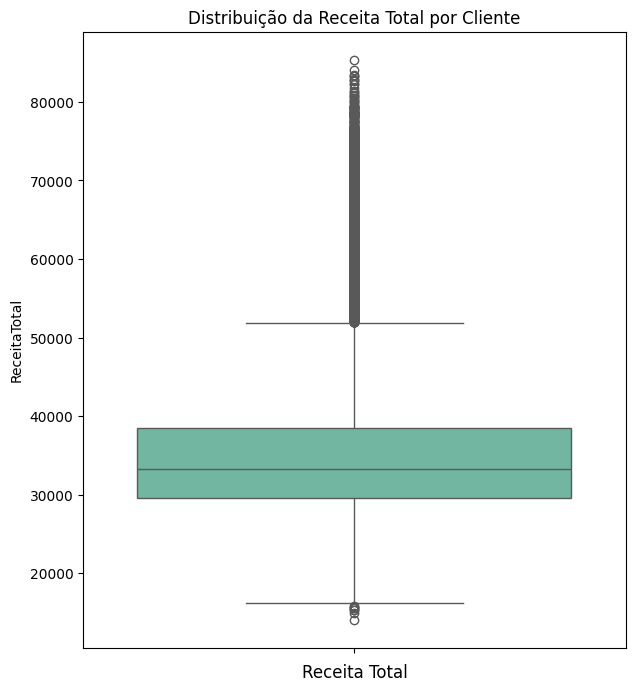

In [15]:
# Criar o Boxplot da Receita total
plt.figure(figsize=(7, 8))
sns.boxplot(data=revenue_df['ReceitaTotal'], orient='v', palette= 'Set2')
plt.title('Distribuição da Receita Total por Cliente', fontsize=12)
plt.xlabel('Receita Total', fontsize=12)
plt.show()

<ipython-input-16-dd6319915d85>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=revenue_df['FrequenciaCompra'], orient='v', palette= 'Set2')


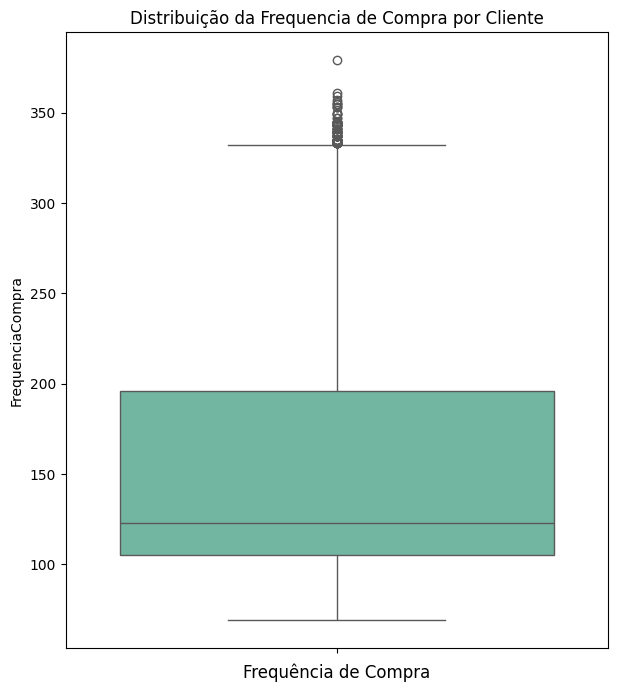

In [16]:
# Criar o Boxplot da Frequencia de Compra
plt.figure(figsize=(7, 8))
sns.boxplot(data=revenue_df['FrequenciaCompra'], orient='v', palette= 'Set2')
plt.title('Distribuição da Frequencia de Compra por Cliente', fontsize=12)
plt.xlabel('Frequência de Compra', fontsize=12)
plt.show()

>A análise do *boxplot* revela a presença de um número significativo de *outliers* na receita total, indicando a existência de um grupo de clientes com gastos consideravelmente superiores aos demais. **Esses clientes, que também apresentam alta frequência de compra, merecem atenção especial, pois podem ser alvo de ofertas personalizadas e ações de fidelização.**
>
>**Uma análise adicional não identificou *outliers* inferiores nas frequência de compra, sugerindo que todos os cliente independente do valor gato, compra com uma certa regularidade.**

In [17]:
#calcular a correção
correlacao = revenue_df['FrequenciaCompra'].corr(revenue_df['ReceitaTotal'])
print(f'A correlação entre Receita Total e Frequência de Compra é de: {correlacao:.2f}')

A correlação entre Receita Total e Frequência de Compra é de: 0.56


<ipython-input-18-b99dae442984>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=revenue_df, x='FrequenciaCompra', y='ReceitaTotal', palette= 'Set2')


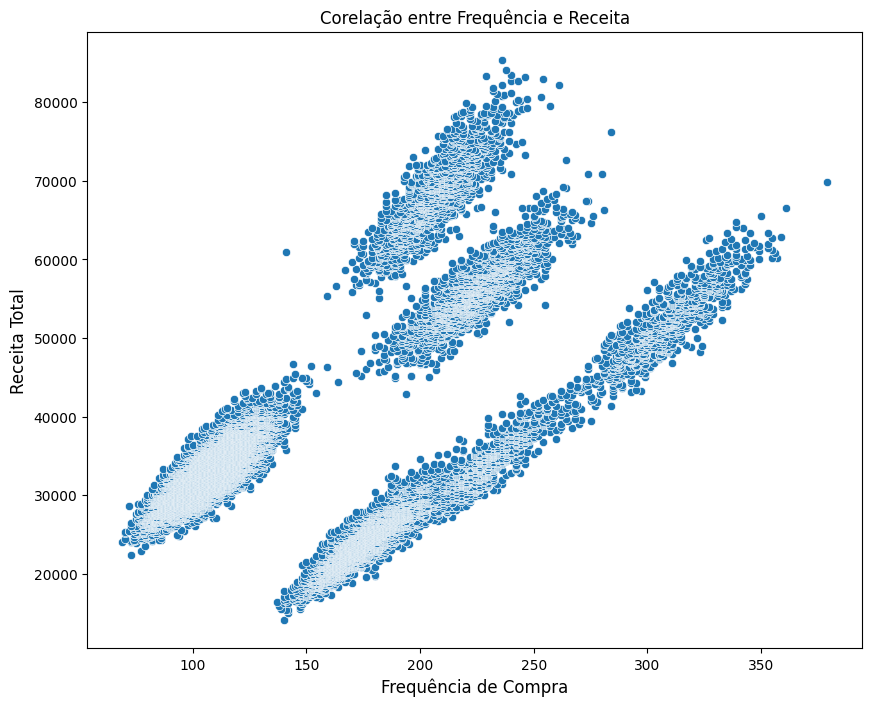

In [18]:
# Criar o scatterplot para corelacionar frequência de compra e receita total
plt.figure(figsize=(10, 8))
sns.scatterplot(data=revenue_df, x='FrequenciaCompra', y='ReceitaTotal', palette= 'Set2')
plt.title('Corelação entre Frequência e Receita', fontsize=12)
plt.xlabel('Frequência de Compra', fontsize=12)
plt.ylabel('Receita Total', fontsize=12)

plt.show()


>Ao observar o gráfico de scatterplot, pode-se verificar que temos uma correlação entre frequência de compra e receita total positiva. **Além disso, essa exploração indicou a existência de 4 agrupamentos distintos, o que pode ser explicado por diferente fatores, como categoria de produtos, segmentos de cliente, promoções ou plano de fidelidade.**
---

### 4\. Modelagem



A próxima etapa ocorrerá a analise dos *outliers* de clientes ***que compra com alta frequência e com receita alta***, trazendo suas características como clientes e compras para trazer melhores ofertas.

Em seguida será aprofundar a análise dos cliente com ***baixa receita total***, buscando identificar suas características e entender os motivos que levam a gastar menos. Essa análise revelara oportunidade de melhoria em nossa estratégia de produtos.


- Vamos está analisando os cliente mais engajados com a nossa marca e os menos engajados, para isso vamos está ultilizando metodos estatiticos para encontrar os *outliers* superiores e inferiores.

In [19]:
# Calcular os limites com base na Receita total
Q1_receita = revenue_df['ReceitaTotal'].quantile(0.25)
Q3_receita = revenue_df['ReceitaTotal'].quantile(0.75)
IQR_receita = Q3_receita - Q1_receita

# Calcular os limites com base na Frequência de Compra
Q1_freq = revenue_df['FrequenciaCompra'].quantile(0.25)
Q3_freq = revenue_df['FrequenciaCompra'].quantile(0.75)
IQR_freq = Q3_freq - Q1_freq

# Limites
Limite_inferior_receita = Q1_receita - 1.5 * IQR_receita
Limite_superior_receita = Q3_receita + 1.5 * IQR_receita

Limite_inferior_freq = Q1_freq - 1.5 * IQR_freq
Limite_superior_freq = Q3_freq + 1.5 * IQR_freq

# Filtrar clientes pelos outliers
outliers_superior_receita = revenue_df[revenue_df['ReceitaTotal'] > Limite_superior_receita]
outliers_inferior_receita = revenue_df[revenue_df['ReceitaTotal'] < Limite_inferior_receita]

outliers_superior_freq = revenue_df[revenue_df['FrequenciaCompra'] > Limite_superior_freq ]
outliers_inferior_freq  = revenue_df[revenue_df['FrequenciaCompra'] < Limite_inferior_freq ]


In [20]:
# Entendento a quantidade de cliente
print(f'Outliers superiores da receita: {outliers_superior_receita.shape[0]}')
print(f'Outliers inferiores da receita: {outliers_inferior_receita.shape[0]}')

print(f'Outliers superiores da frequencia de compra: {outliers_superior_freq.shape[0]}')
print(f'Outliers inferiores da frequencia de compra: {outliers_inferior_freq.shape[0]}')

Outliers superiores da receita: 3177
Outliers inferiores da receita: 8
Outliers superiores da frequencia de compra: 91
Outliers inferiores da frequencia de compra: 0


In [21]:
# Mesclar os clientes dos limites superiores de receita e frequência de compra
clientes_valiosos = pd.concat([outliers_superior_receita, outliers_superior_freq]).drop_duplicates(subset='IdCliente')


In [22]:
clientes_valiosos.sort_values('IdCliente').head(10)


IdCliente  ReceitaTotal  FrequenciaCompra  TicketMedio
17042          1      60931.88               141       432.14
15587         80      53408.48               208       256.77
15999         81      55283.90               222       249.03
18221         82      72734.62               206       353.08
18321         83      74747.68               210       355.94
18438         84      78528.58               230       341.43
15315        141      51953.02               304       170.90
18408        174      76849.64               229       335.59
18414        175      77345.41               216       358.08
18450        178      79053.66               222       356.10

> Pelo resultado obtido, podemos analisar que os cliente que estão nos outliers superiores frequência de compra estão contidos dentro dos outliers superiores da receita, ja que a quantidade de linhas dentro do `dataframe` acima permaneceu em **3177**.

Colunas numéricas em nosso conjunto de dados possuem escalas significativamente diferentes. Essa disparidade pode levar ao **domínio de features** com maior magnitude, **influenciando desproporcionalmente** os resultados dos algoritmos de aprendizado de máquina, como os de clustering. Para mitigar esse problema, é fundamental **padronizar os dados**, garantindo que todas as variáveis contribuam de forma equitativa para a formação dos clusters.

In [23]:
# definindo os atributos para calculos

media_ReceitaTotal = clientes_valiosos['ReceitaTotal'].mean()
media_FrequenciaCompra = clientes_valiosos['FrequenciaCompra'].mean()
media_TicketMedio = clientes_valiosos['TicketMedio'].mean()
desvio_padrao_ReceitaTotal = clientes_valiosos['ReceitaTotal'].std()
desvio_padrao_FrequenciaCompra = clientes_valiosos['FrequenciaCompra'].std()
desvio_padrao_TicketMedio = clientes_valiosos['TicketMedio'].std()

print(media_ReceitaTotal)
print(media_FrequenciaCompra)
print(media_TicketMedio)
print(desvio_padrao_ReceitaTotal)
print(desvio_padrao_FrequenciaCompra)
print(desvio_padrao_TicketMedio)

clientes_valiosos['ReceitaTotal_padr'] = clientes_valiosos['ReceitaTotal'].apply(lambda x: (x - media_ReceitaTotal) / desvio_padrao_ReceitaTotal)
clientes_valiosos['FrequenciaCompra_padr'] = clientes_valiosos['FrequenciaCompra'].apply(lambda x: (x - media_FrequenciaCompra) / desvio_padrao_FrequenciaCompra)
clientes_valiosos['TicketMedio_padr'] = clientes_valiosos['TicketMedio'].apply(lambda x: (x - media_TicketMedio) / desvio_padrao_TicketMedio)

61568.67791627322
232.30941139439722
272.9272080579163
7053.1936270409415
40.09368299128709
55.340720728596786


In [24]:
clientes_valiosos = clientes_valiosos.drop(columns=['ReceitaTotal', 'FrequenciaCompra', 'TicketMedio'])

In [25]:
clientes_valiosos.sort_values('IdCliente').head(10)

IdCliente  ReceitaTotal_padr  FrequenciaCompra_padr  TicketMedio_padr
17042          1          -0.090285              -2.277401          2.876956
15587         80          -1.156951              -0.606315         -0.291959
15999         81          -0.891054              -0.257133         -0.431820
18221         82           1.583104              -0.656198          1.448351
18321         83           1.868516              -0.556432          1.500031
18438         84           2.404571              -0.057600          1.237837
15315        141          -1.363306               1.788077         -1.843619
18408        174           2.166531              -0.082542          1.132309
18414        175           2.236821              -0.406783          1.538700
18450        178           2.479016              -0.257133          1.502922

- Vamos separar os clientes da base de dados para retirar os insights demograficos deles

In [26]:
id_clientes_valiosos = clientes_valiosos['IdCliente'].tolist()

Com base nos dados da tabela `DimCustomer`, poderemos criar clusters significativos usando variáveis que impactam diretamente o comportamento de compra.

Selecionaremos variáveis relevantes para o Cluster, que ajudem a escolher a diferenciar os cliente:

- YearlyIncome
- Education
- Occupation
- NumberCarsOwned


```sql
SELECT
	CustomerKey,
	YearlyIncome,
	Education,
	Occupation,
	NumberCarsOwned
FROM
	DimCustomer
WHERE CustomerType = 'Person'


In [28]:
# base de dados de demografia dos clientes
columns = ['CustomerKey', 'YearlyIncome', 'Education', 'Occupation', 'NumberCarsOwned']

demography_df = pd.read_csv('/content/Projeto_Analise_de_Vendas/arquivos_csv/resultado_query_yearlyincome_education_Occupation_numbercars.csv', sep=';', header=None)

# renomeia as colunas
demography_df.columns = columns

In [29]:
demography_df.head()

CustomerKey YearlyIncome  Education    Occupation  NumberCarsOwned
0            1     90000,00  Bachelors  Professional                0
1            2     60000,00  Bachelors  Professional                1
2            3     60000,00  Bachelors  Professional                1
3            4     70000,00  Bachelors  Professional                1
4            5     80000,00  Bachelors  Professional                4

In [30]:
# quantidade de cliente
demography_df.shape

(18484, 5)

In [31]:
# qualidade dos dados
demography_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerKey      18484 non-null  int64 
 1   YearlyIncome     18484 non-null  object
 2   Education        18484 non-null  object
 3   Occupation       18484 non-null  object
 4   NumberCarsOwned  18484 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 722.2+ KB


- Será filtrado o dataframe `demography_df`, com o dataframe `clientes_valiosos`. Onde será selecionados apendas clientes com a demografia especifica dos clientes valiosos.

In [32]:
demography_df = demography_df[demography_df['CustomerKey'].isin(id_clientes_valiosos)]

In [33]:
demography_df.shape[0]

3177

In [34]:
# qualidade dos dados
demography_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3177 entries, 0 to 18433
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerKey      3177 non-null   int64 
 1   YearlyIncome     3177 non-null   object
 2   Education        3177 non-null   object
 3   Occupation       3177 non-null   object
 4   NumberCarsOwned  3177 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 148.9+ KB


 - Vamos começar o tratamento para essa base de dados

In [35]:
# YearlyIncome está como object, mas é float
demography_df.YearlyIncome = demography_df.YearlyIncome.str.replace(',', '.').astype(float).round(2)

In [36]:
demography_df.head(3)

CustomerKey  YearlyIncome        Education    Occupation  NumberCarsOwned
0             1       90000.0        Bachelors  Professional                0
79           80      160000.0  Graduate Degree    Management                2
80           81      170000.0  Graduate Degree    Management                2

In [37]:
# qualidade dos dados
demography_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3177 entries, 0 to 18433
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerKey      3177 non-null   int64  
 1   YearlyIncome     3177 non-null   float64
 2   Education        3177 non-null   object 
 3   Occupation       3177 non-null   object 
 4   NumberCarsOwned  3177 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 148.9+ KB


- Tratando as variáveis categóricas ordinais

In [38]:
# categorico ordinal
educations = demography_df['Education'].unique()
print(educations)

['Bachelors' 'Graduate Degree' 'Partial High School' 'Partial College'
 'High School']


In [39]:
# categorias
education_categories ={
    'Partial High School': 1,
    'High School': 2,
    'Partial College': 3,
    'Bachelors': 4,
    'Graduate Degree': 5,
}

In [40]:
# adcionado os dados
demography_df['Education'] = demography_df['Education'].apply(lambda level: education_categories[level])


In [41]:
demography_df.head(10)

CustomerKey  YearlyIncome  Education    Occupation  NumberCarsOwned
0              1       90000.0          4  Professional                0
79            80      160000.0          5    Management                2
80            81      170000.0          5    Management                2
81            82      120000.0          4    Management                3
82            83      130000.0          5    Management                3
83            84      130000.0          5    Management                3
140          141       30000.0          1      Clerical                2
173          174      110000.0          5    Management                4
174          175      110000.0          5    Management                0
177          178      110000.0          5    Management                2

- Iremos usar a técnica de **Padronização** na coluna *YearlyIncome* para normalizar os dados. Esse processo é fundamental para evitar que variáveis com grandes amplitudes dominem o processo de **aprendizado de máquina**.

In [42]:
# definindo os atributos para calculos

media_YearlyIncome = demography_df['YearlyIncome'].mean()
desvio_padrao_YearlyIncome = demography_df['YearlyIncome'].std()
print(media_YearlyIncome)
print(desvio_padrao_YearlyIncome)

87850.17311929494
44726.346359743


In [43]:
# aplicando a padronização
demography_df['YearlyIncome_padr'] = demography_df['YearlyIncome'].apply(lambda x: (x - media_YearlyIncome) / desvio_padrao_YearlyIncome)


In [44]:
demography_df.head()

CustomerKey  YearlyIncome  Education    Occupation  NumberCarsOwned  \
0             1       90000.0          4  Professional                0   
79           80      160000.0          5    Management                2   
80           81      170000.0          5    Management                2   
81           82      120000.0          4    Management                3   
82           83      130000.0          5    Management                3   

    YearlyIncome_padr  
0            0.048066  
79           1.613139  
80           1.836721  
81           0.718812  
82           0.942394

In [45]:
demography_df = demography_df.drop(columns=['YearlyIncome'])

In [46]:
demography_df.head()

CustomerKey  Education    Occupation  NumberCarsOwned  YearlyIncome_padr
0             1          4  Professional                0           0.048066
79           80          5    Management                2           1.613139
80           81          5    Management                2           1.836721
81           82          4    Management                3           0.718812
82           83          5    Management                3           0.942394

- Unir os DataFrames `clientes_valiosos` e `demography_df`

In [47]:
# renomar coluna
demography_df = demography_df.rename(columns={'CustomerKey': 'IdCliente'})

In [48]:
# unir os DataFrames 'clientes_valiosos' e demography_df
customers_valiosos = pd.merge(clientes_valiosos, demography_df, on='IdCliente')

In [49]:
customers_valiosos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3177 entries, 0 to 3176
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   IdCliente              3177 non-null   int64  
 1   ReceitaTotal_padr      3177 non-null   float64
 2   FrequenciaCompra_padr  3177 non-null   float64
 3   TicketMedio_padr       3177 non-null   float64
 4   Education              3177 non-null   int64  
 5   Occupation             3177 non-null   object 
 6   NumberCarsOwned        3177 non-null   int64  
 7   YearlyIncome_padr      3177 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 198.7+ KB


In [50]:
nova_ordem = ['IdCliente', 'ReceitaTotal_padr', 'FrequenciaCompra_padr',
       'TicketMedio_padr', 'YearlyIncome_padr','Education', 'Occupation','NumberCarsOwned']

customers_valiosos = customers_valiosos.reindex(columns=nova_ordem)

In [51]:
customers_valiosos

IdCliente  ReceitaTotal_padr  FrequenciaCompra_padr  TicketMedio_padr  \
0           436          -1.367471              -0.506549         -0.506087   
1         18342          -1.366884               2.012551         -1.933968   
2         16223          -1.365412               1.987610         -1.923669   
3         17301          -1.365132               2.012551         -1.933246   
4          7155          -1.364762              -0.282075         -0.684617   
...         ...                ...                    ...               ...   
3172       1170           3.073602               0.341465          1.183085   
3173       2430           3.085498              -0.082542          1.643686   
3174       3436           3.105299               0.191815          1.352942   
3175        291           3.189744               0.141932          1.450881   
3176        182           3.373688               0.092049          1.604294   

      YearlyIncome_padr  Education    Occupation  NumberCarsOwned  
0              0.271648          3    Management                4  
1             -1.293425          1      Clerical                2  
2             -1.517007          1      Clerical                2  
3             -1.293425          2  Professional                2  
4              0.271648          4    Management                4  
...                 ...        ...           ...              ...  
3172           0.718812          2  Professional                4  
3173           1.389557          4    Management                3  
3174           0.495230          5    Management                3  
3175           0.942394          4    Management                3  
3176           1.836721          5    Management                2  

[3177 rows x 8 columns]

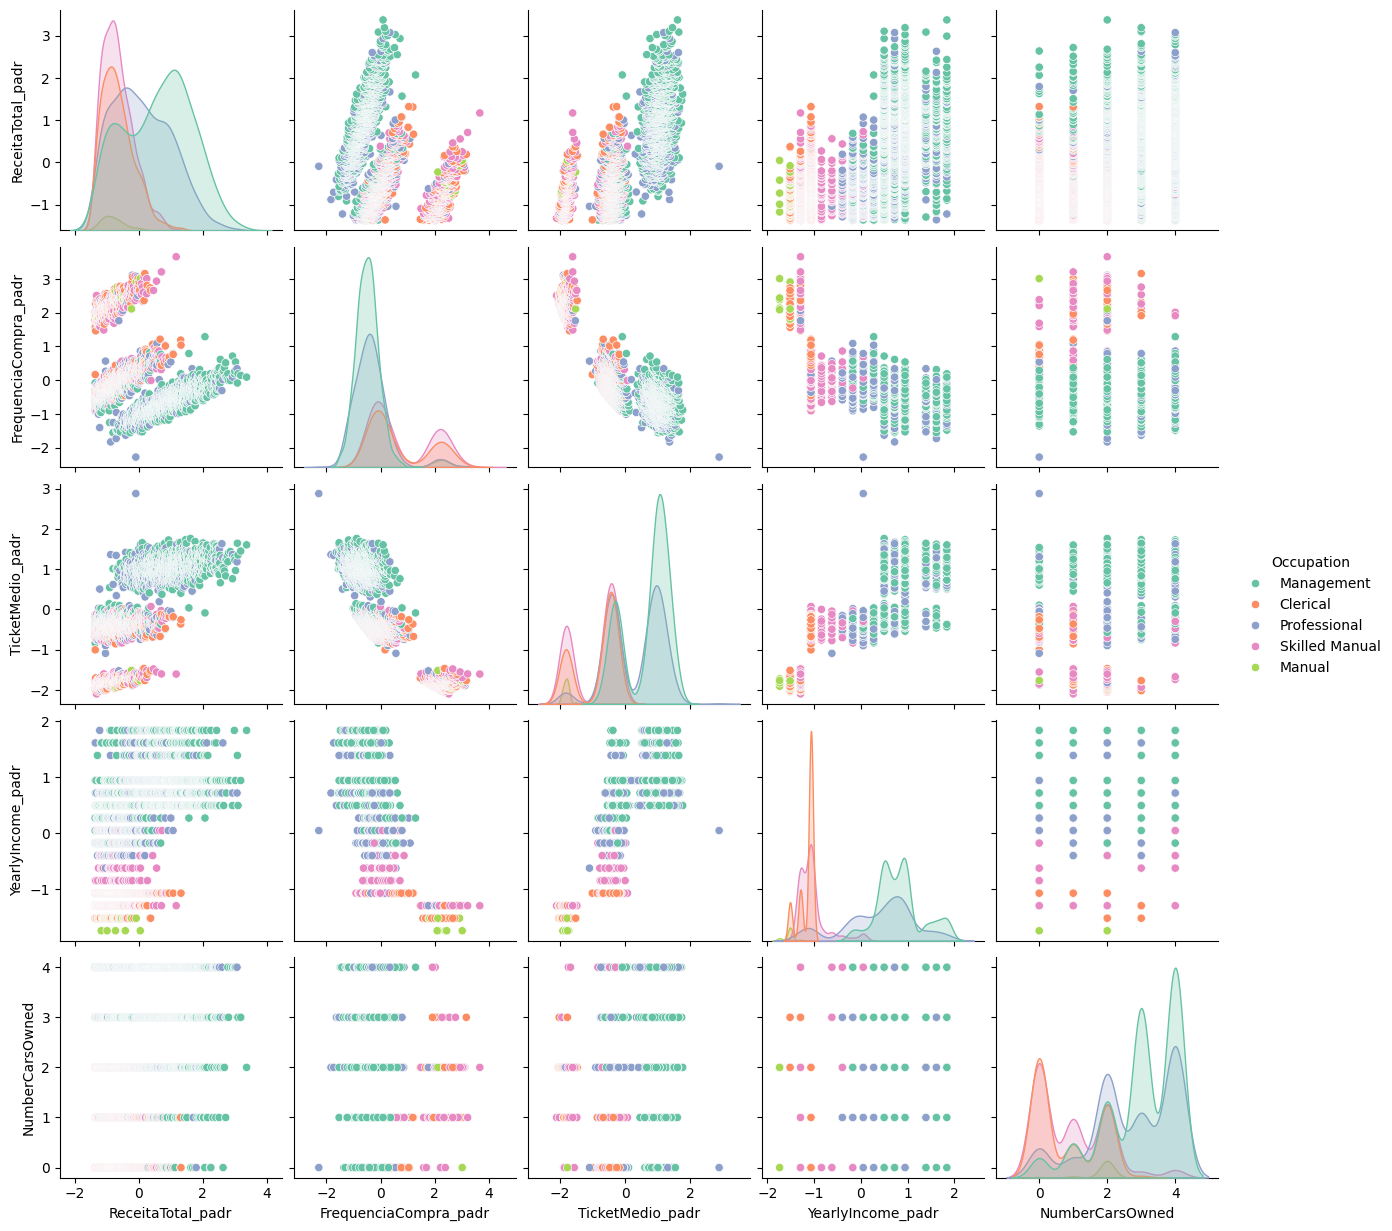

In [52]:
sns.pairplot(customers_valiosos.drop(columns=['IdCliente', 'Education']), hue='Occupation', palette='Set2')
plt.savefig('meu_grafico_seaborn.png')

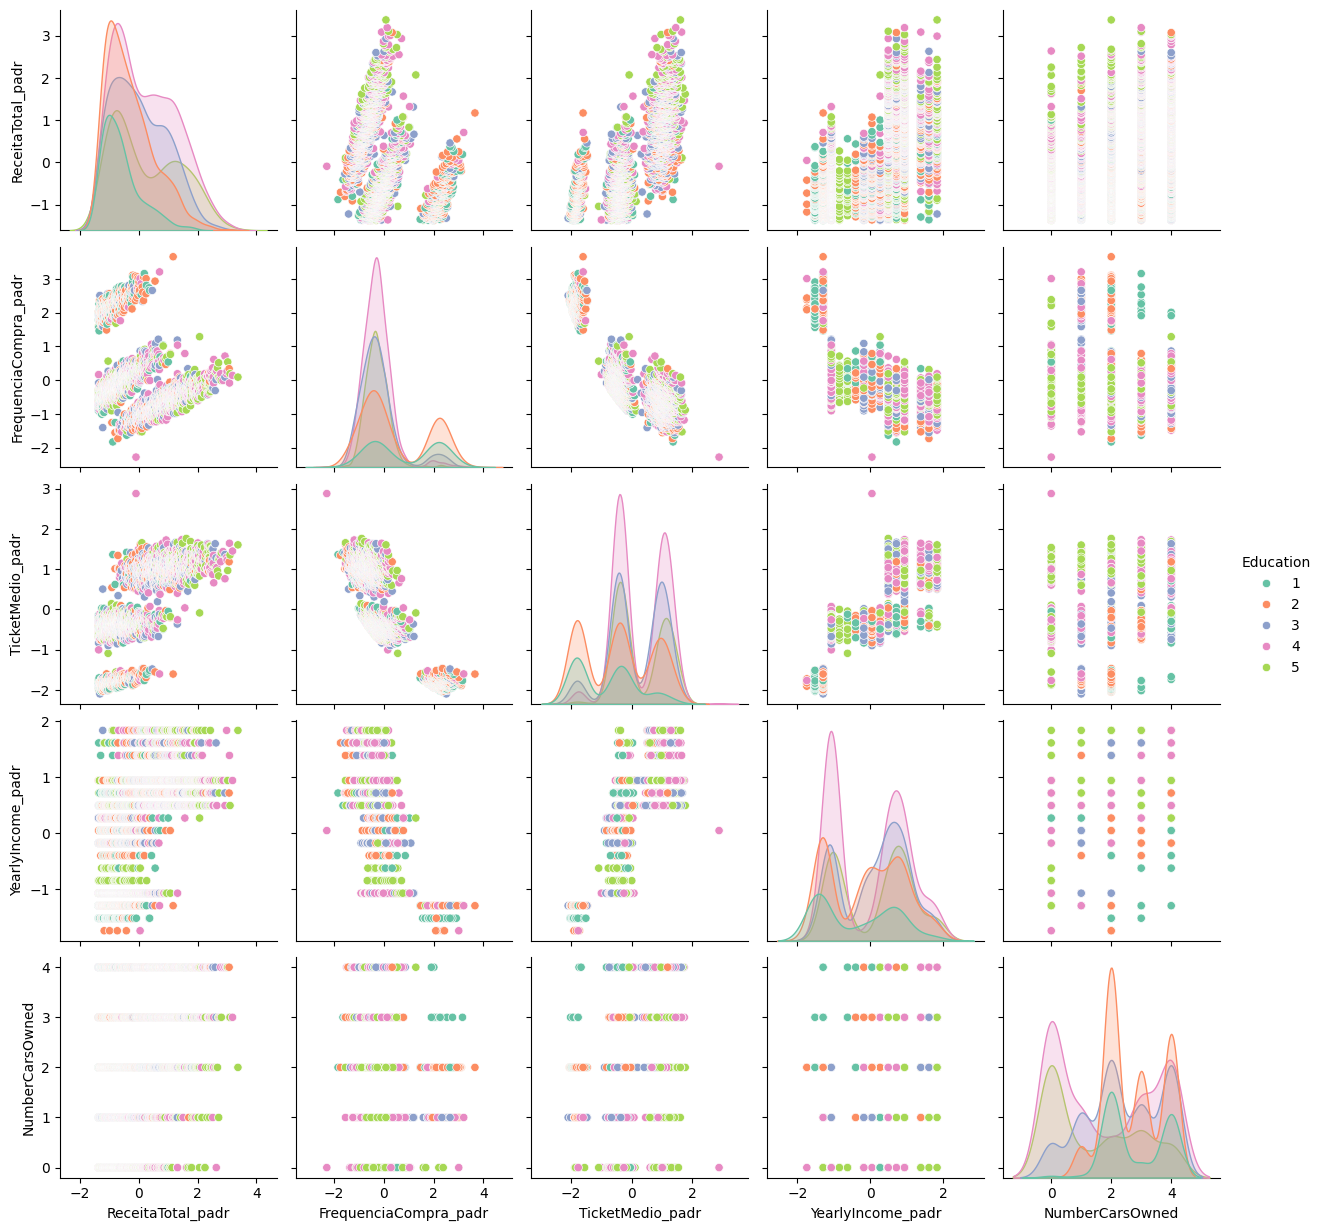

In [53]:
sns.pairplot(customers_valiosos.drop(columns=['IdCliente', 'Occupation']), hue='Education', palette='Set2')
plt.savefig('meu_grafico_seaborn1.png')

> O gráfico Pairplot nos ajuda a entender a relação entre  duas variaveis, junto com o *hue*, ele ajuda a dividir os dados em subconjuntos com base nos valores de uma varíavel categórica.
Com os gráfico plotados, pode-se verificar alguns agrupamentos e relações, no entanto os agrupamentos apresentaram uma maior relação com a variável ***Occupation***, ao inves da variável ***Education*** dos clientes, por exemplo:
>
> - Na variável ***YearlyIncome_padr***, individuos com a ocupação *Management* e *Professional* apresenta maior dispersão nos valores mais altos, enquanto *Manual* e *Clerical* apresenta maior disperção nas faixas de menores valores.
>
> - Em ***TicketMedio_padr***, percebe-se que as ocupações *Professional* e *Management* tem maior variação, enquanto outras categorias tedem a apresentar menor disperção
>
> Essas observações sugerem que a ocupação do cliente pode ter uma influência mais significativa nos padrões de comportamento analisados, como a frênquencia de compra, ticket médio e renda anual, do que o nível de educação.

In [54]:
customers_valiosos.head()

IdCliente  ReceitaTotal_padr  FrequenciaCompra_padr  TicketMedio_padr  \
0        436          -1.367471              -0.506549         -0.506087   
1      18342          -1.366884               2.012551         -1.933968   
2      16223          -1.365412               1.987610         -1.923669   
3      17301          -1.365132               2.012551         -1.933246   
4       7155          -1.364762              -0.282075         -0.684617   

   YearlyIncome_padr  Education    Occupation  NumberCarsOwned  
0           0.271648          3    Management                4  
1          -1.293425          1      Clerical                2  
2          -1.517007          1      Clerical                2  
3          -1.293425          2  Professional                2  
4           0.271648          4    Management                4

#### **3\.1  Treino**

- Será treinado 10 modelos de **k-means** variando o número de clusters de 1 a 10, para poder entender a qualidade dos clusters com o uso do **método do cotovelo**.

In [55]:
# guardando as variaveis
wcss = []

In [56]:
# retirando a coluna id Cliente
customers_valiosos = customers_valiosos.drop(columns=['IdCliente'])

In [57]:
for k in range(1, 11):

  model = KMeans(n_clusters=k, algorithm ='elkan')
  model = model.fit(customers_valiosos.drop(columns=['Occupation']))
  wcss.append(model.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1400: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


#### **3\.2  Avaliação**

- Verificando uma quantidade boa de Clusters

In [58]:
wcss

[24166.37834435003,
 13628.801373964861,
 9653.164813589028,
 6941.73666490689,
 5986.667960487287,
 5301.262918668865,
 4688.867351723146,
 4355.444991515274,
 4353.835869665308,
 3909.1579978817745]

<Axes: xlabel='Clusters'>

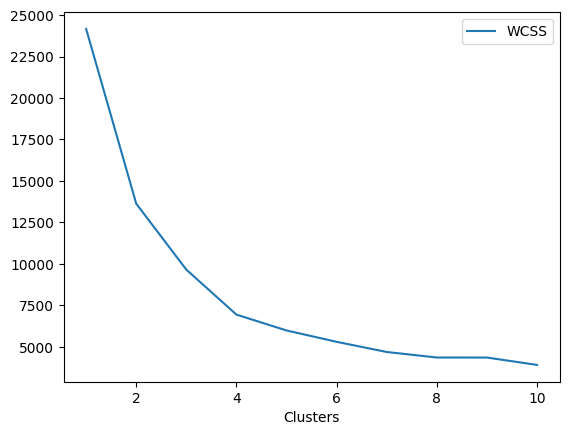

In [59]:
df = pd.DataFrame({'Clusters': list(range(1, len(wcss)+1)), 'WCSS': wcss})
df.plot(x='Clusters', y='WCSS')

> Analisando o gráfico de cotovelo, observamos que a curva apresenta um "cotovelo" pronunciado entre 3 e 5 clusters. **Essa inflexão sugere que a formação de 3 a 5 grupos pode ser a mais adequada para modelar os dados**, uma vez que a adição de mais clusters não proporciona um ganho significativo na explicação da variabilidade dos dados.

#### **3\.3  Visualização**

- **3 Clusters**

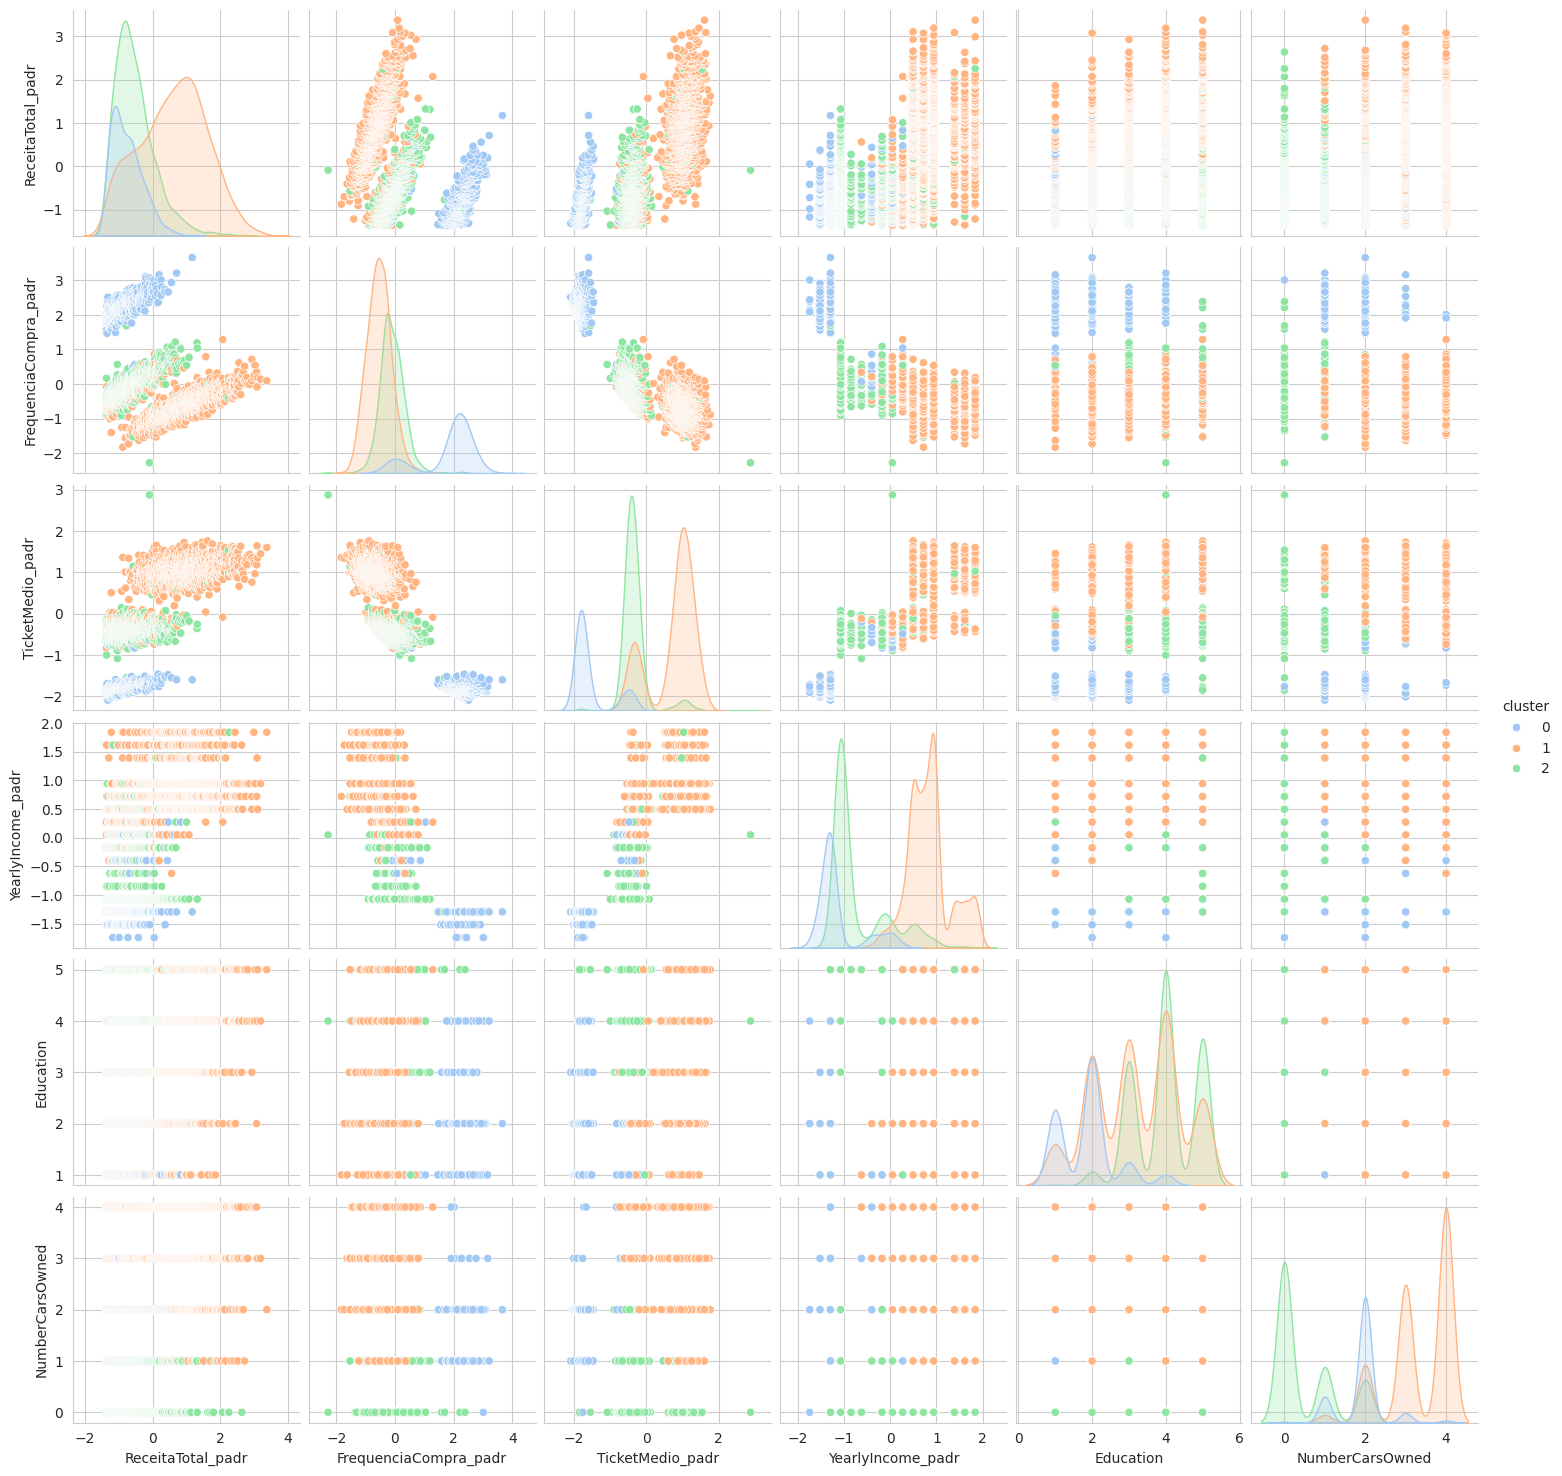

In [60]:
model = KMeans(n_clusters=3, algorithm ='elkan')
model = model.fit(customers_valiosos.drop(columns=['Occupation']))

clusters = model.labels_
clustered_data = pd.concat([customers_valiosos, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_data, hue='cluster', palette="pastel")
  plt.savefig('/content/Projeto_Analise_de_Vendas/Imagens/cluster03.png')

- **4 Clusters**

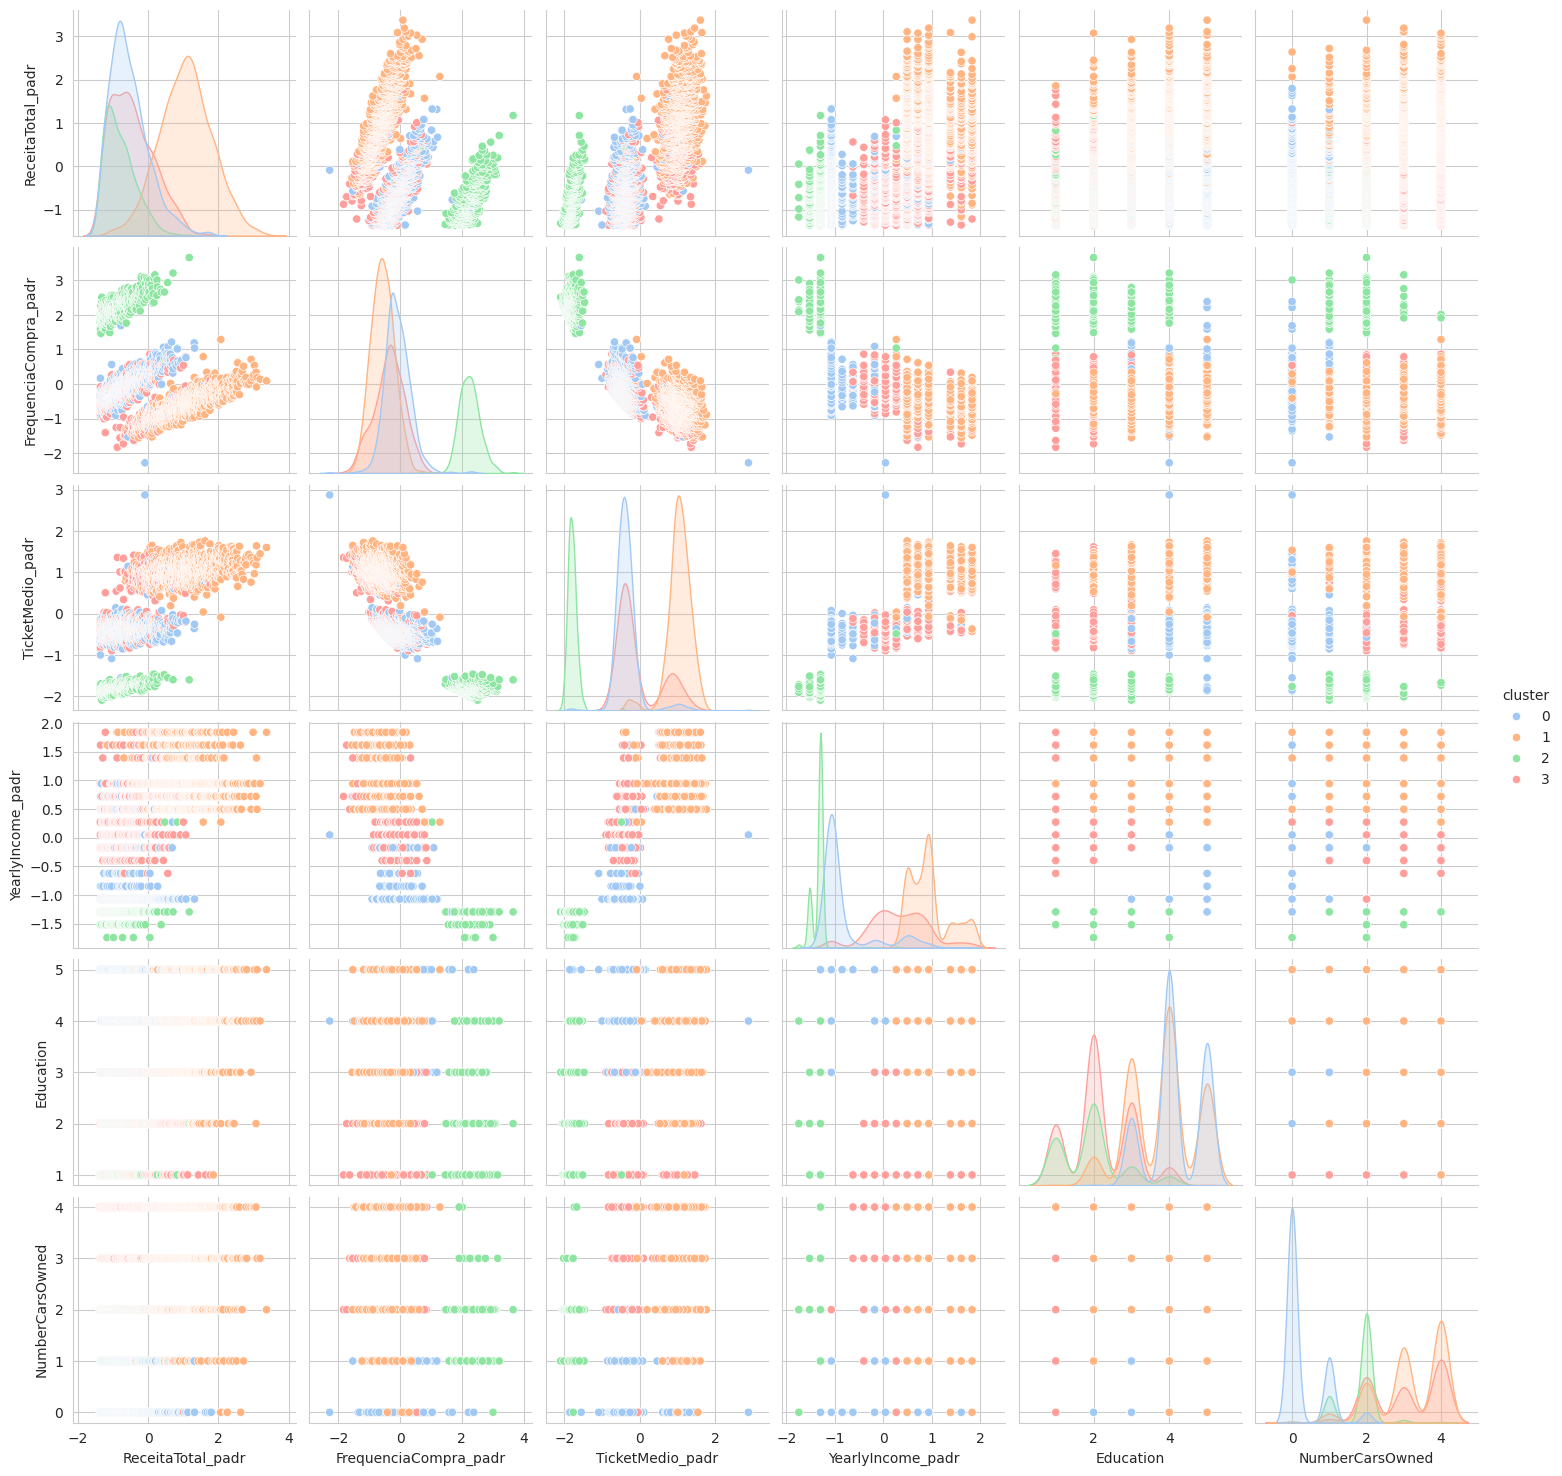

In [61]:
model = KMeans(n_clusters=4, algorithm ='elkan')
model = model.fit(customers_valiosos.drop(columns=['Occupation']))

clusters = model.labels_
clustered_data = pd.concat([customers_valiosos, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_data, hue='cluster', palette="pastel")
  plt.savefig('/content/Projeto_Analise_de_Vendas/Imagens/cluster04.png')

- **5 Clusters**

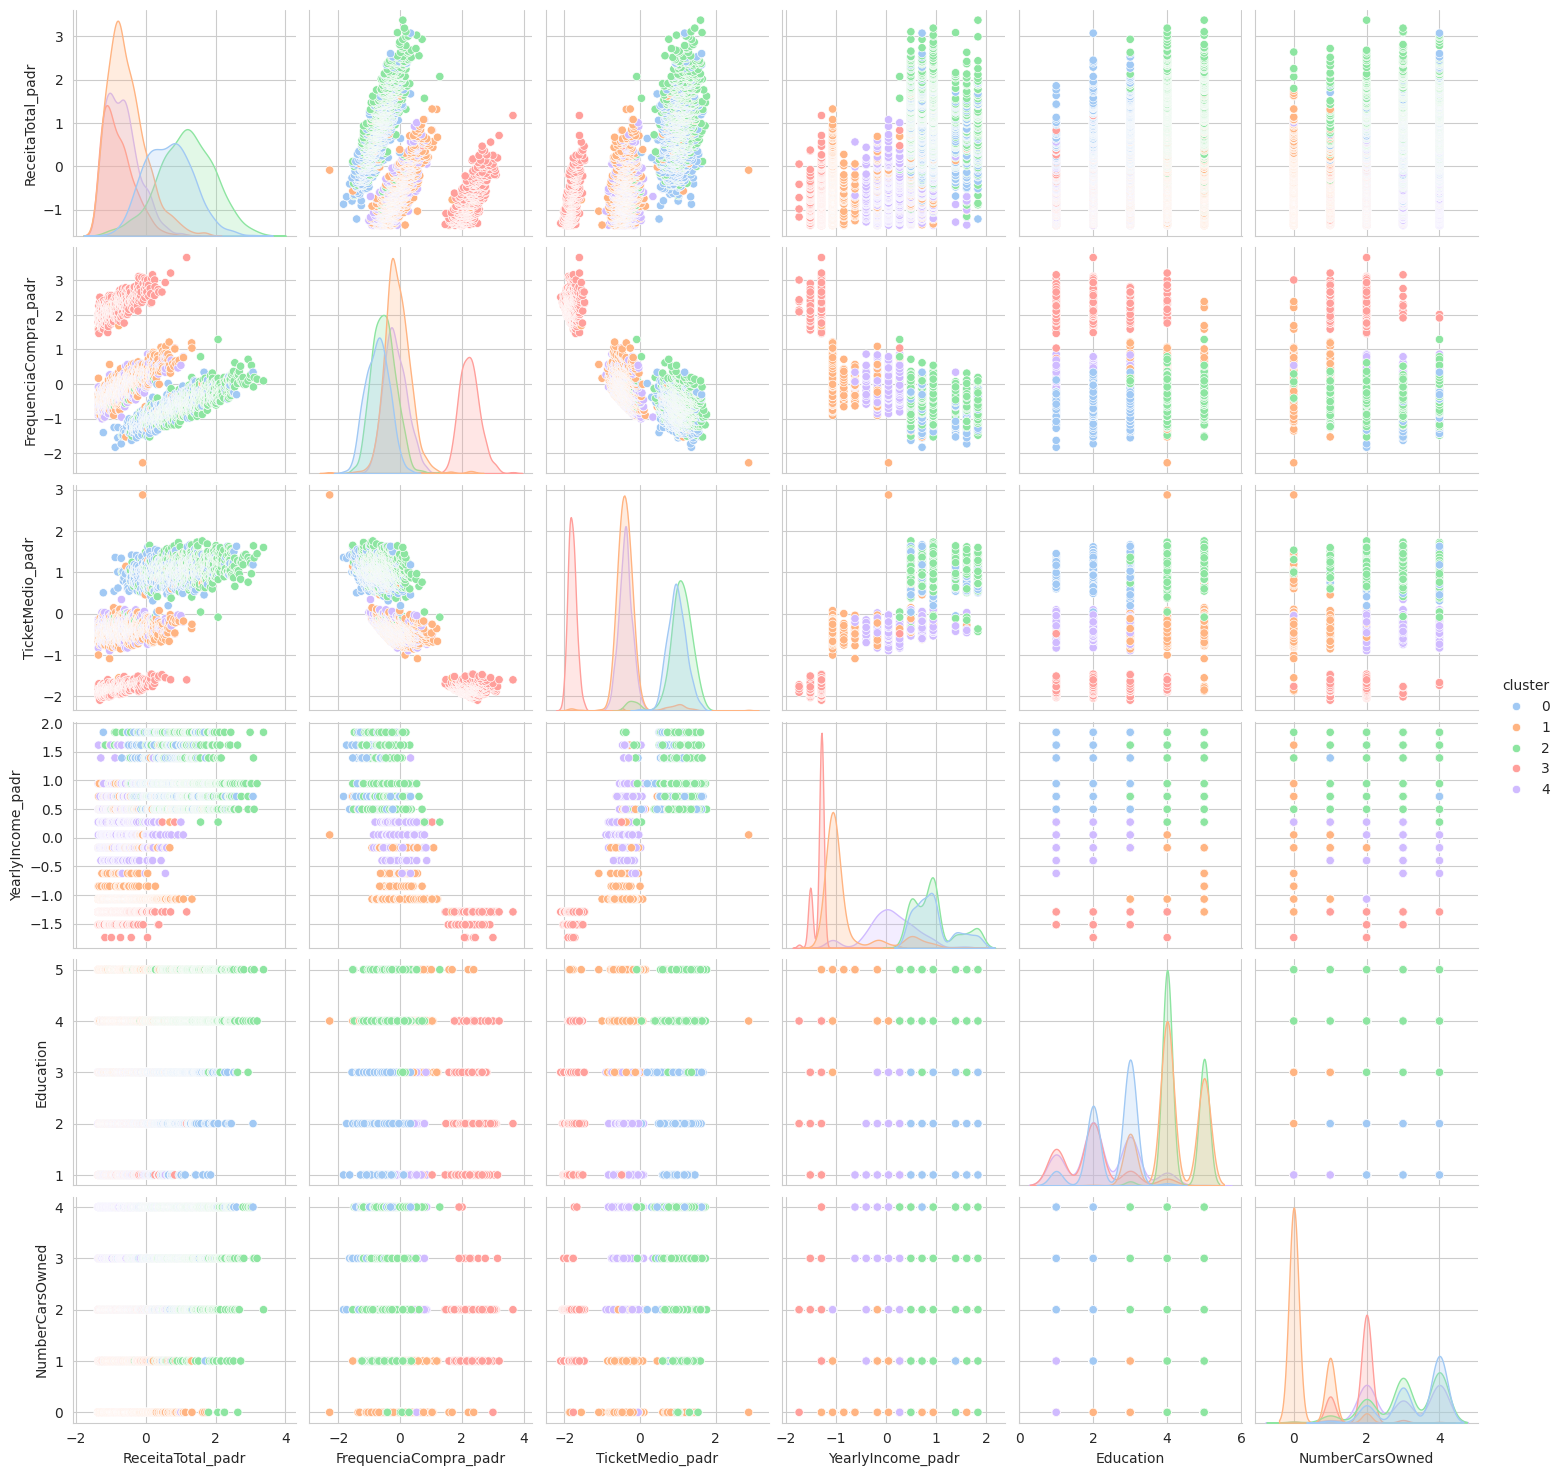

In [62]:
model = KMeans(n_clusters=5, algorithm ='elkan')
model = model.fit(customers_valiosos.drop(columns=['Occupation']))

clusters = model.labels_
clustered_data = pd.concat([customers_valiosos, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_data, hue='cluster', palette="pastel")
  plt.savefig('/content/Projeto_Analise_de_Vendas/Imagens/cluster05.png')

> Com base em nossa análise, decidimos escolher os dados com 4 clusters distintos. Essa segmentação nos permitirá compreender melhor as características de cada grupo e desenvolver estratégias mais eficazes. A escolha de 4 clusters foi fundamentada na busca por um equilíbrio entre a granularidade da análise e a interpretação dos resultados.

#### **3\.4  Estudo dos clusters**

In [63]:
model = KMeans(n_clusters=4, algorithm ='elkan', init='k-means++', random_state=38)
model = model.fit(customers_valiosos.drop(columns=['Occupation']))

clusters = model.labels_
clustered_data = pd.concat([customers_valiosos, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

pd.crosstab(clustered_data['Occupation'], clustered_data['cluster'])

cluster           0    1    2    3
Occupation                        
Clerical        348    0    0  149
Management      107  737  274    0
Manual            0    0    0   32
Professional    107  288  483   37
Skilled Manual  353    0   46  216


> O objetivo principal desta análise é compreender as características ocupacionais predominantes em cada cluster, sem a pretensão de determinar com precisão a ocupação para os clusters. É possível indentificar que os grupos 1 e 2, tem permanetimente ocupação **Management** e **Professional**, enquanto os grupos 0 e 3 tem caracteristicas de ocupação **Clerical** e **Skilled Manual**


Para melhor analise do gráfico abaixo será preciso saber os niveis educacionais antes da conversão ordinal que foi feita.

- Ensino Médio Parcial: 1
- Ensino Médio: 2
- Faculdade Parcial: 3
- Bacharelado: 4
- Graduação: 5

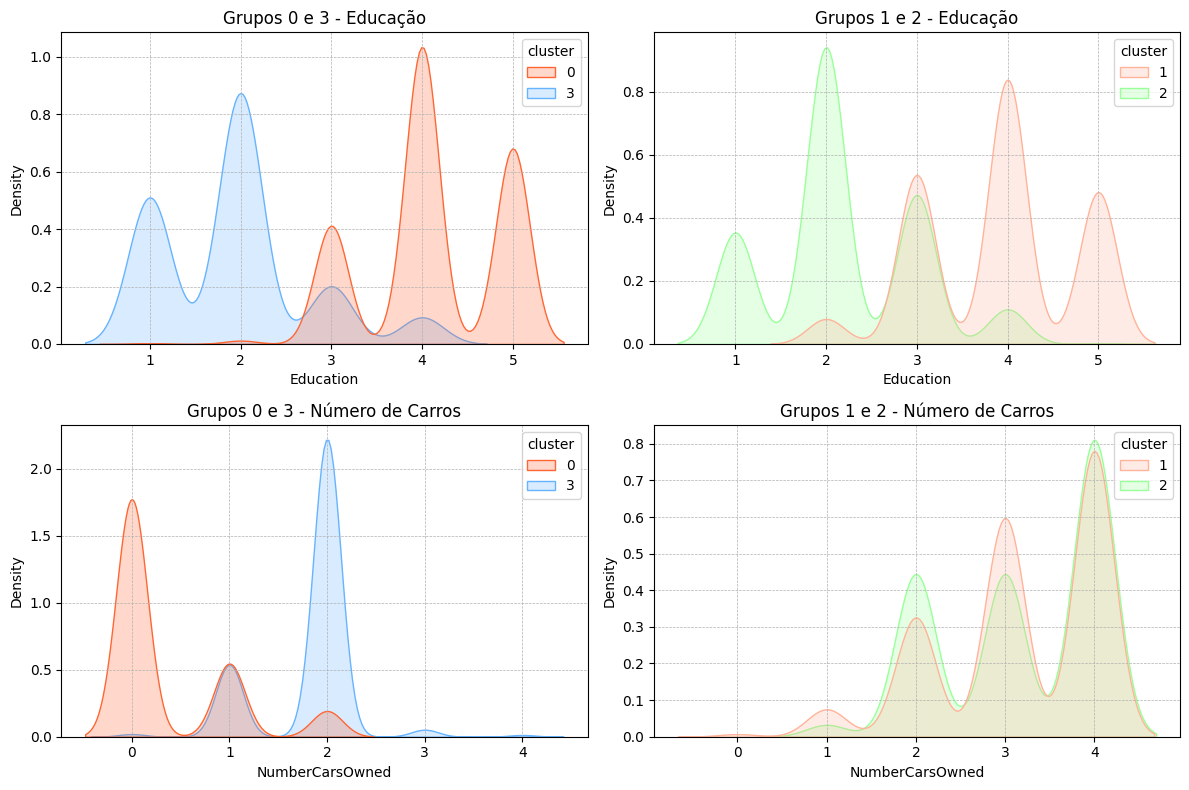

In [64]:
# Filtrando os dados para cada conjunto de grupos

df_03 = clustered_data.query('cluster == 0 | cluster == 3')
df_12 = clustered_data.query('cluster == 1 | cluster == 2')

#cor dos grupos
color_map = {0: "#FF6633", 1: "#FFB399", 2: "#99FF99", 3: "#66B3FF"}

# Criando a figura com quatro subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))


# Primeira linha: Gráficos para Education
sns.kdeplot(data=df_03, x='Education', hue='cluster', fill=True, common_norm=False, palette=color_map, ax=axes[0, 0])
axes[0, 0].set_title('Grupos 0 e 3 - Educação')
axes[0, 0].grid(True, which='both', linestyle='--', linewidth=0.5)

sns.kdeplot(data=df_12, x='Education', hue='cluster', fill=True, common_norm=False, palette=color_map, ax=axes[0, 1])
axes[0, 1].set_title('Grupos 1 e 2 - Educação')
axes[0, 1].grid(True, which='both', linestyle='--', linewidth=0.5)

# Segunda linha: Gráficos para NumberCarsOwned
sns.kdeplot(data=df_03, x='NumberCarsOwned', hue='cluster', fill=True, common_norm=False, palette=color_map, ax=axes[1, 0])
axes[1, 0].set_title('Grupos 0 e 3 - Número de Carros')
axes[1, 0].grid(True, which='both', linestyle='--', linewidth=0.5)

sns.kdeplot(data=df_12, x='NumberCarsOwned', hue='cluster', fill=True, common_norm=False, palette=color_map, ax=axes[1, 1])
axes[1, 1].set_title('Grupos 1 e 2 - Número de Carros')
axes[1, 1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

> Nesse momento, é importante analisá varíaveis demograficas dos custers para ter um melhor entendimento das caracteriscas de cada um. Os clusters 1 e 3, **apresentam níveis educacionais mais elevados** em comparação aos clusters 0 e 2. No entanto os grupos 0 e 3, possuem **menos veículos** do que os grupos 1 e 2. Essa difernça pode está relacionado ao nível de emprego que cada um desses grupos está mais concentrados, já que os grupos com ocupação **Management** e **Professional**, tendem a ter maior renda, e consequentemente, um padrão de vida mais elevado.


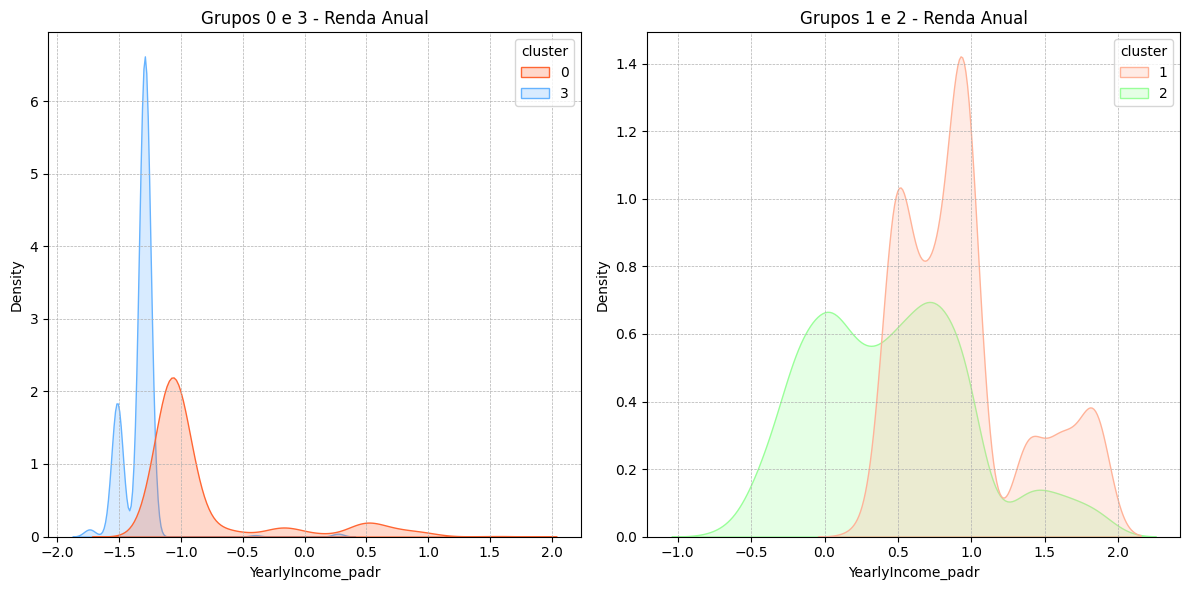

In [65]:
# Criando a figura com quatro subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Primeira linha: Gráficos para YearlyIncome_padr
sns.kdeplot(data=df_03, x='YearlyIncome_padr', hue='cluster', fill=True, common_norm=False, palette=color_map, ax=axes[0])
axes[0].set_title('Grupos 0 e 3 - Renda Anual')
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

sns.kdeplot(data=df_12, x='YearlyIncome_padr', hue='cluster', fill=True, common_norm=False, palette=color_map, ax=axes[1])
axes[1].set_title('Grupos 1 e 2 - Renda Anual')
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

> Os clusters 0 e 3 concentram a **menor renda anual**, enquanto os clusters 1 e 2 apresentam **rendas anuais mais elevadas**, novamente o tipo de ocupação mais presentes em cada cluster reflete a análise feita.

In [66]:
print(clustered_data.columns)

Index(['ReceitaTotal_padr', 'FrequenciaCompra_padr', 'TicketMedio_padr',
       'YearlyIncome_padr', 'Education', 'Occupation', 'NumberCarsOwned',
       'cluster'],
      dtype='object')


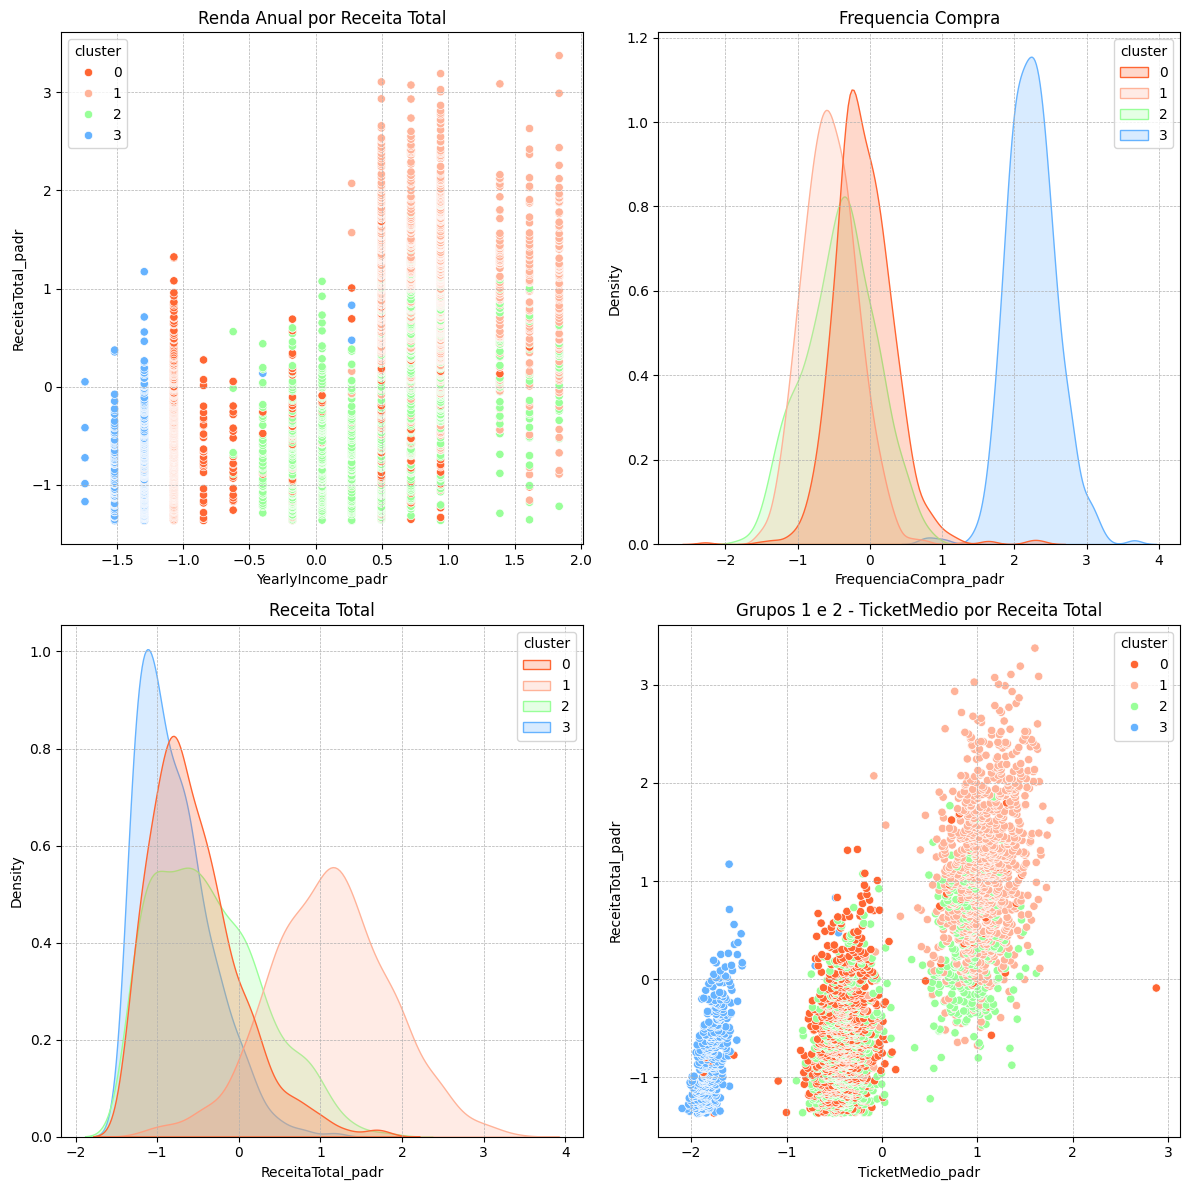

In [67]:
# Criando a figura com quatro subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))


# Primeira linha: Gráficos para Renda Anual por Receita Total
sns.scatterplot(data=clustered_data, x="YearlyIncome_padr", y="ReceitaTotal_padr", hue='cluster', palette=color_map, ax=axes[0, 0])
axes[0, 0].set_title('Renda Anual por Receita Total')
axes[0, 0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Segunda linha: Gráficos para Frequencia Compra
sns.kdeplot(data=clustered_data, x='FrequenciaCompra_padr', hue='cluster', fill=True, common_norm=False, palette=color_map, ax=axes[0, 1])
axes[0, 1].set_title('Frequencia Compra')
axes[0, 1].grid(True, which='both', linestyle='--', linewidth=0.5)

# Segunda linha: Gráficos para Receita Total
sns.kdeplot(data=clustered_data, x='ReceitaTotal_padr', hue='cluster', fill=True, common_norm=False, palette=color_map, ax=axes[1, 0])
axes[1, 0].set_title('Receita Total')
axes[1, 0].grid(True, which='both', linestyle='--', linewidth=0.5)

sns.scatterplot(data=clustered_data, x="TicketMedio_padr", y="ReceitaTotal_padr", hue='cluster', palette=color_map, ax=axes[1, 1])
axes[1, 1].set_title('Grupos 1 e 2 - TicketMedio por Receita Total')
axes[1, 1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.savefig('/content/Projeto_Analise_de_Vendas/Imagens/analise_clusters2.png')
plt.show()

**Renda Anual por Receita Total (Gráfico Superior Esquerdo):**

- Os Clusters **0** e **3** possuem maior concentração de clientes com menor **Receita Total**, mesmo com níveis de **Renda Anual** variados.

- O Cluster **2** possue uma **Renda Anual** intermediaria e uma **Receita Total** média.

- O Cluster **1** tem clientes com **Renda Anual** em diferentes faixas superiores, com uma distribuição equilibrada na **Receita Total**

**Frequência de Compra (Gráfico Superior Direito):**

- O cluster **3** é o que possui a maior **Frequência de Compra**, indicando clientes altamente engajados com a Marca.

- Os clustes **0**, **1** e **2** tem **Frequência de Compra** relativamente similar, mas significativamente menor em relação ao cluster **3**



**Receita Total (Gráfico Inferior Esquerdo):**

- O clusters **0**, **2** e **3**, são os que possuem mais clientes com menor **Receita Total**.

- O cluster **1** está distribuido na faixa média, indicando que mesmo sua **Frequência de Compra** seja baixo, o valor dos produtos comprados **Ticket Médio** alto.

**Ticket Médio por Receita Total (Gráfico Inferior Direito):**

- O cluster **3**, apresenta o menor **Ticket Médio** e **Receita Total**

- O cluster **1**, apresenta um **Ticket Médio** em conjunto com a **Receita Total**, mesmo com **Frequência de Compra** baixa, comprovando a tese do gráfico anterior.

**Insights Valiosos:**

- Importante entender as características demográficas, junto com os comportamentos dos clientes, para montar estratégias de marketing.

1. **Cluster 3:**  
   - Possuem skills de ocupação mais voltadas para **Clerical** e **Skilled Manual**.  
   - O nível de educação tem maior concentração no **Ensino Médio**.  
   - Sua **Renda Anual** é a mais baixa.  
   - No entanto, apresentam alta **Frequência de Compra**, ou seja, são clientes mais engajados e provavelmente os mais fiéis.

2. **Cluster 0:**  
   - Possuem skills de ocupação mais voltadas para **Clerical** e **Skilled Manual**.  
   - O nível de educação tem maior concentração em **Bacharelado** e **Graduação**.  
   - Sua **Renda Anual** é baixa.  
   - Portam entre **1** e **2** **veículos**.  
   - Apresentam baixa **Receita Total**. Possivelmente um segmento de clientes menos rentável, mas com potencial de crescimento com ofertas direcionadas.

3. **Cluster 1:**  
   - Possuem skills de ocupação mais voltadas para **Management** e **Professional**.  
   - O nível de educação tem maior concentração no **Ensino Médio**.  
   - Sua **Renda Anual** é alta.  
   - Portam entre **2** e **4** **veículos**.  
   - Apresentam alta **Receita Total** e baixa **Frequência de Compra**. Teoricamente, compradores de produtos de **Ticket Médio** alto.

4. **Cluster 2:**
 - Possuem skills de ocupação mais voltadas para **Management** e **Professional**.  
 - O nível de educação tem maior concentração acima de **Faculdade Parcial**.  
 - Sua **Renda Anual** é intermediária.  
 - Portam entre **2** e **4** **veículos**.  
 - Apresentam **Receita Total** e **Frequência de Compra** médias. Teoricamente, provavelmente representando uma base estável e confiável.

**Estratégias Sugestivas:**

- **Cluster 3**: Programas de fidelidade e recomendações personalizadas para manter o engajamento.
- **Cluster 0**: Ofertas promocionais para aumentar a frequência de compra e ticket médio.
- **Cluster 1** e **2**: Aprofundar a análise para entender subgrupos e o  tipo de produto comprado para criar estratégias específicas.